   # Projeto 2 - Ciência do Dados
___

   ## Arthur Pansini; Enzo Fonteyne; Andre Faia.

   Nosso projeto é focado na industria automobilistica, na qual utilizamos das variaveis ano de fabricação, modelo, tipo de câmbio e quilometros rodados para analizar quais dessas caracteristicas estão mais presentes em carros vendidos acima dos 20 mil dolares. Buscamos trazer uma base de dados ampla e com enorme diversidade de informações acerca do tema, para que se aproxime o maximo possível da realidade!

In [699]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Para ter melhor print
from IPython.display import display

In [700]:
data = pd.read_csv("carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [701]:
filtro = data.loc[:,["Price", "Prod. year","Gear box type", "Mileage", 'Cylinders', 'Leather interior',
                    'Engine volume', 'Airbags']]

In [702]:
filtro

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
0,13328,2010,Automatic,186005 km,6.0,Yes,3.5,12
1,16621,2011,Tiptronic,192000 km,6.0,No,3,8
2,8467,2006,Variator,200000 km,4.0,No,1.3,2
3,3607,2011,Automatic,168966 km,4.0,Yes,2.5,0
4,11726,2014,Automatic,91901 km,4.0,Yes,1.3,4
...,...,...,...,...,...,...,...,...
19232,8467,1999,Manual,300000 km,4.0,Yes,2.0 Turbo,5
19233,15681,2011,Tiptronic,161600 km,4.0,Yes,2.4,8
19234,26108,2010,Automatic,116365 km,4.0,Yes,2,4
19235,5331,2007,Automatic,51258 km,4.0,Yes,2,4


In [703]:
filtro.isnull().sum()

Price               0
Prod. year          0
Gear box type       0
Mileage             0
Cylinders           0
Leather interior    0
Engine volume       0
Airbags             0
dtype: int64

In [704]:
filtro.tail(10)

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
19227,29793,2014,Automatic,219030 km,6.0,Yes,3.5,12
19228,706,2008,Automatic,122874 km,6.0,Yes,3.5,12
19229,50,2008,Automatic,150000 km,4.0,No,1.5,6
19230,470,2011,Automatic,307325 km,4.0,Yes,1.8,12
19231,5802,2013,Automatic,107800 km,6.0,Yes,3.5,12
19232,8467,1999,Manual,300000 km,4.0,Yes,2.0 Turbo,5
19233,15681,2011,Tiptronic,161600 km,4.0,Yes,2.4,8
19234,26108,2010,Automatic,116365 km,4.0,Yes,2,4
19235,5331,2007,Automatic,51258 km,4.0,Yes,2,4
19236,470,2012,Automatic,186923 km,4.0,Yes,2.4,12


In [705]:
filtro.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


In [706]:
data1 = (filtro.loc[filtro['Price']>=20000])
data1 = (data1.loc[filtro['Price']<=120000])
data1 = (data1.loc[filtro['Prod. year']>=2005])

In [707]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,5542.000000,5542.000000,5542.000000,5542.000000
mean,36082.578852,2013.806027,4.647239,6.595633
std,16572.230011,2.861745,1.306720,3.924408
min,20000.000000,2005.000000,1.000000,0.000000
25%,23743.500000,2012.000000,4.000000,4.000000
50%,30784.000000,2014.000000,4.000000,4.000000
75%,43132.500000,2016.000000,4.000000,10.000000
max,119172.000000,2020.000000,16.000000,16.000000


In [708]:
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
5,39493,2016,Automatic,160931 km,4.0,Yes,2,4
9,26657,2007,Automatic,128500 km,6.0,Yes,3.5,12
14,59464,2016,Automatic,76000 km,4.0,Yes,2,4
17,28382,2016,Automatic,54317 km,4.0,Yes,1.8,4
21,20698,2012,Automatic,187000 km,4.0,Yes,1.8,12


In [709]:
data1.isnull().sum()

Price               0
Prod. year          0
Gear box type       0
Mileage             0
Cylinders           0
Leather interior    0
Engine volume       0
Airbags             0
dtype: int64

In [710]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

In [711]:
gear = pd.get_dummies(data1['Gear box type'])
interior = pd.get_dummies(data1['Leather interior'])

In [712]:
data1 = pd.concat([data1, gear], axis=1)
data1 = pd.concat([data1, interior], axis=1)
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
5,39493,2016,Automatic,160931,4.0,Yes,2,4,1,0,0,0,0,1
9,26657,2007,Automatic,128500,6.0,Yes,3.5,12,1,0,0,0,0,1
14,59464,2016,Automatic,76000,4.0,Yes,2,4,1,0,0,0,0,1
17,28382,2016,Automatic,54317,4.0,Yes,1.8,4,1,0,0,0,0,1
21,20698,2012,Automatic,187000,4.0,Yes,1.8,12,1,0,0,0,0,1


In [713]:
data1.Cylinders.describe()

count    5542.000000
mean        4.647239
std         1.306720
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        16.000000
Name: Cylinders, dtype: float64

In [714]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

In [715]:
data1['Prod. year'].describe()

count    5542.000000
mean     2013.806027
std         2.861745
min      2005.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: Prod. year, dtype: float64

In [716]:
data1.tail(10)

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
19198,28225,2015,Automatic,149019,4.0,Yes,2.5,0,1,0,0,0,0,1
19200,36065,2013,Tiptronic,68000,4.0,Yes,2.0,12,0,0,1,0,0,1
19206,22075,2012,Automatic,52456,4.0,Yes,1.5,4,1,0,0,0,0,1
19207,22197,2012,Automatic,50000,4.0,Yes,1.5,4,1,0,0,0,0,1
19208,34811,2013,Tiptronic,121400,4.0,No,2.5,6,0,0,1,0,1,0
19211,50037,2016,Automatic,121902,4.0,Yes,2.0,4,1,0,0,0,0,1
19216,37633,2017,Tiptronic,23430,4.0,Yes,2.5,12,0,0,1,0,0,1
19217,26017,2009,Automatic,132700,4.0,Yes,3.5,4,1,0,0,0,0,1
19227,29793,2014,Automatic,219030,6.0,Yes,3.5,12,1,0,0,0,0,1
19234,26108,2010,Automatic,116365,4.0,Yes,2.0,4,1,0,0,0,0,1


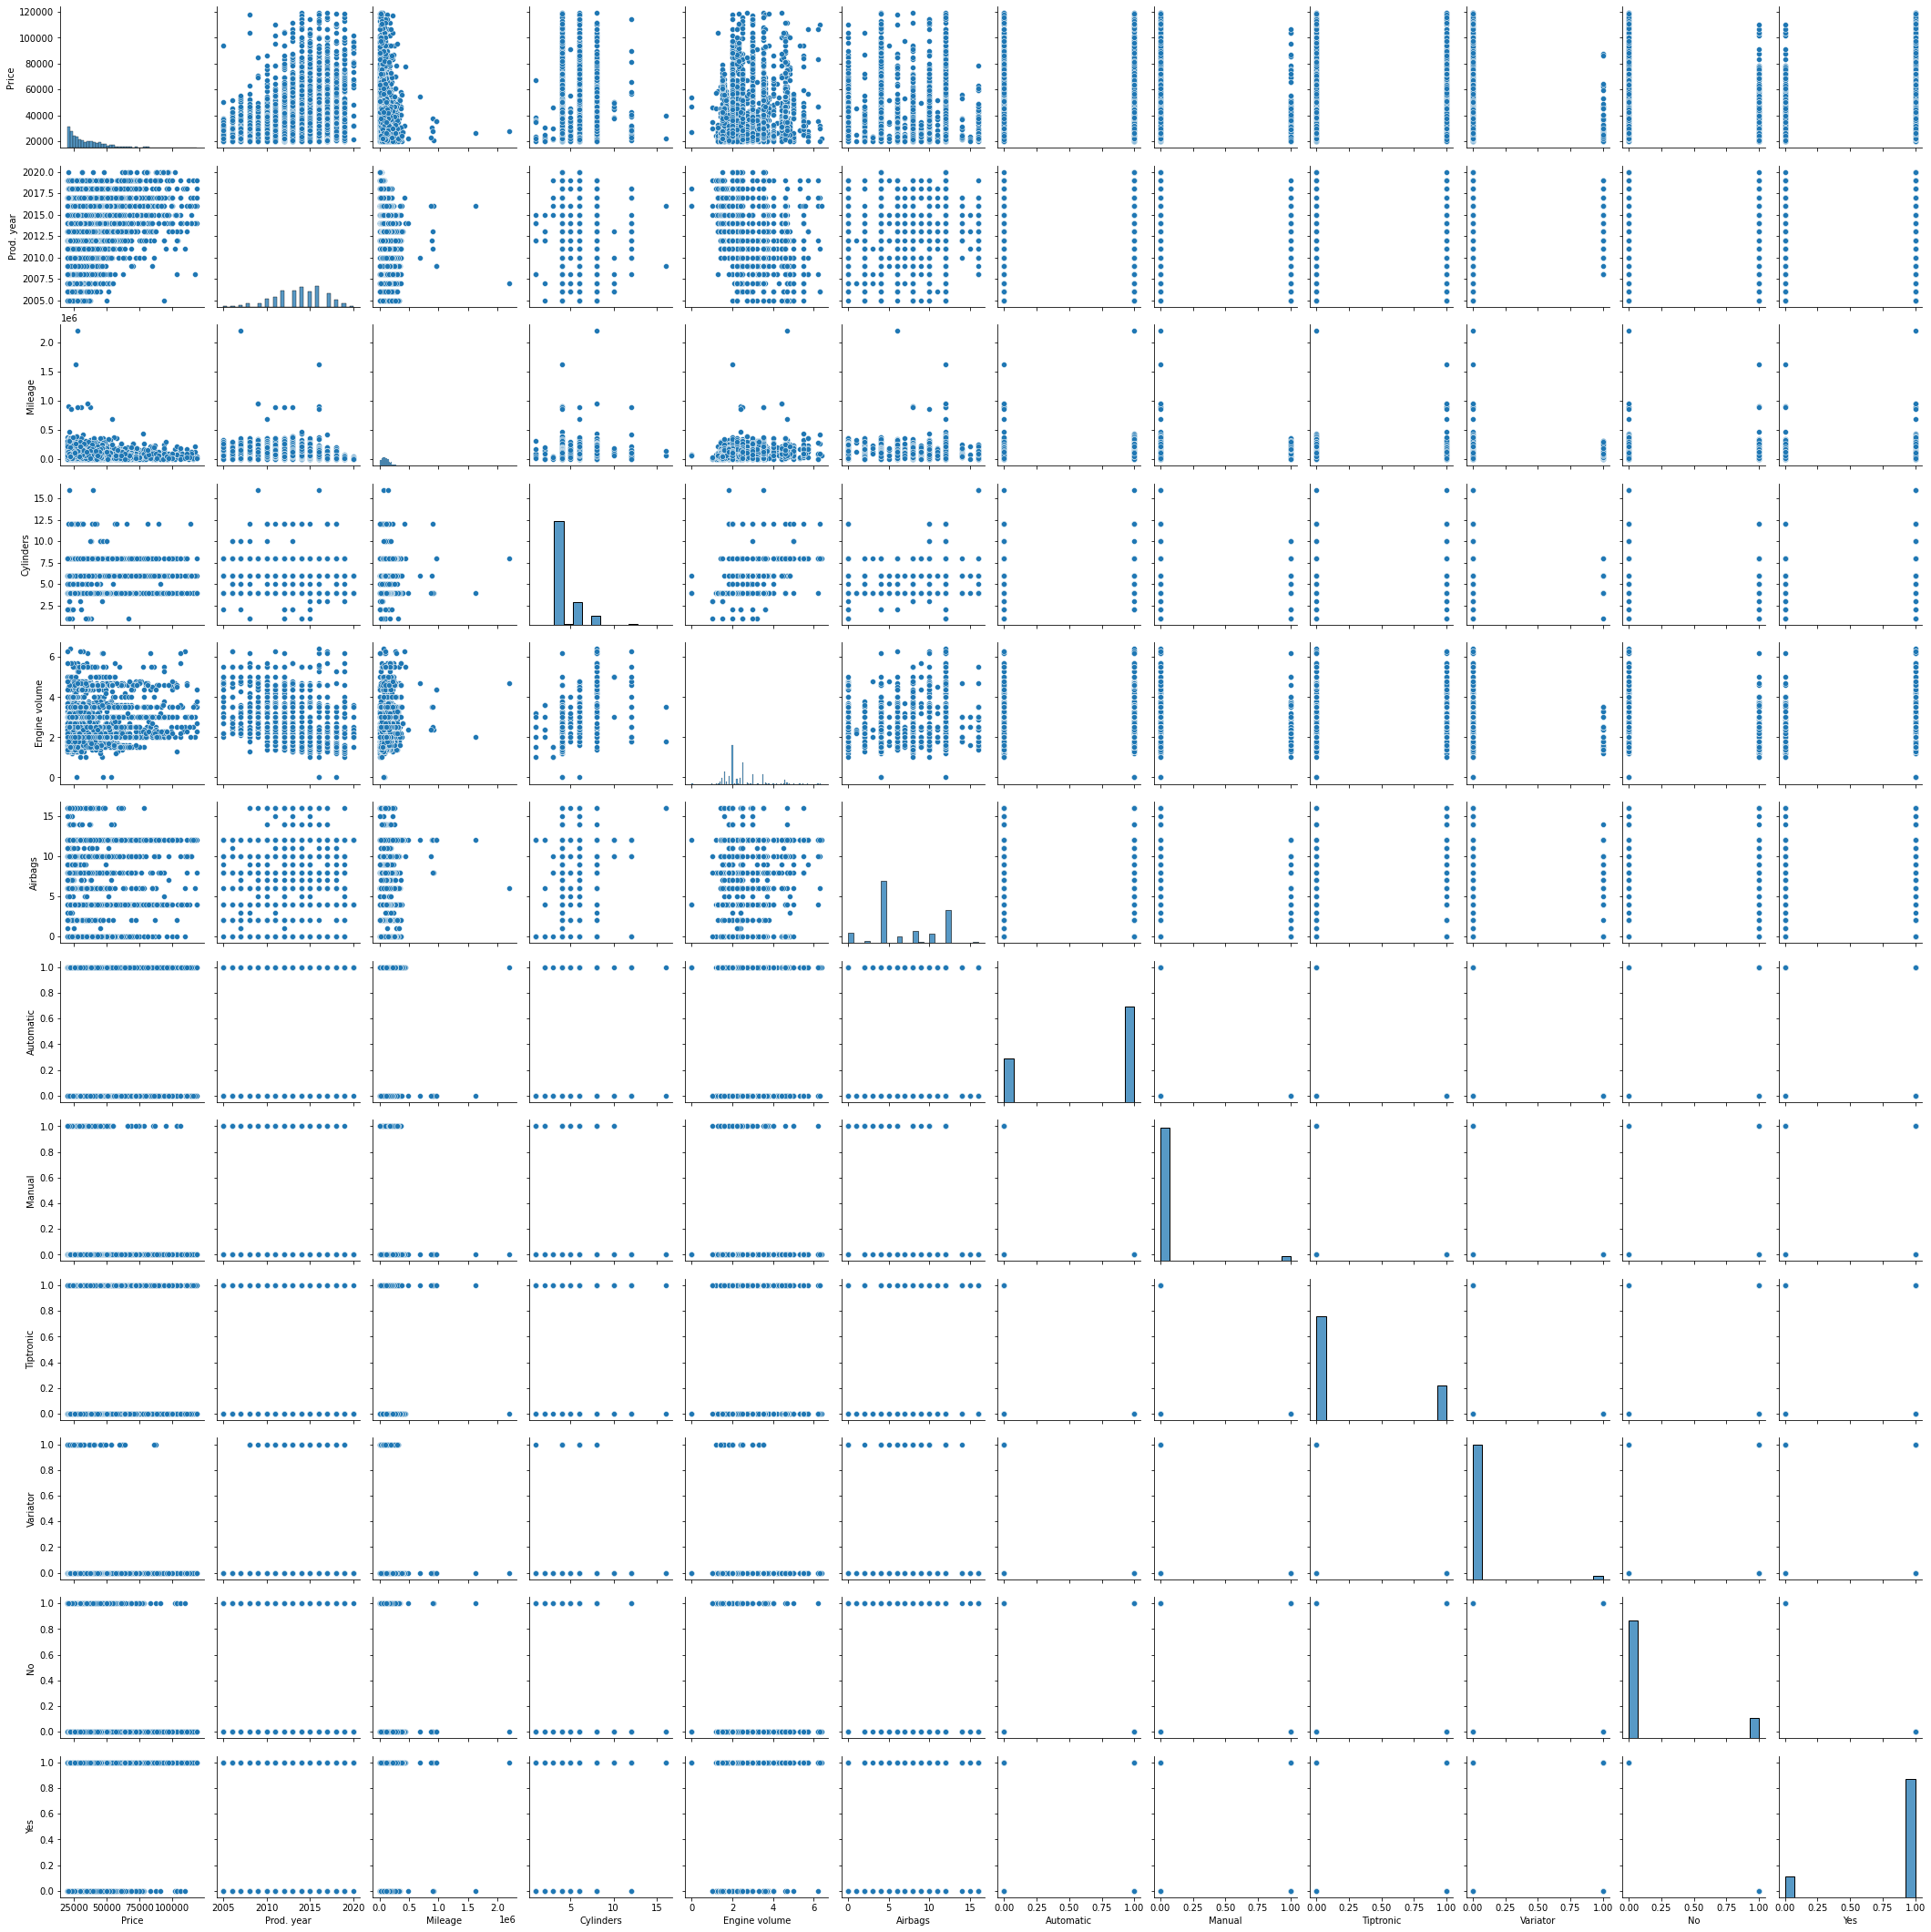

In [717]:
sns.pairplot(data1)

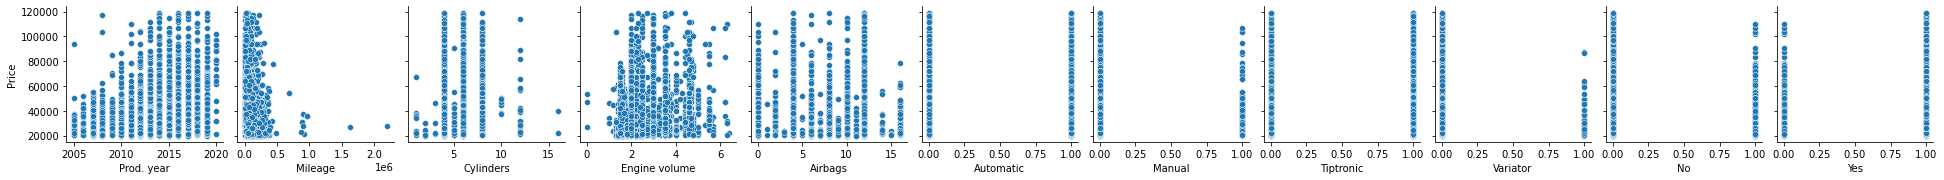

In [718]:
sns.pairplot(data1, x_vars=["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes',], y_vars=['Price'])

In [719]:
data1.dtypes

Price                 int64
Prod. year            int64
Gear box type        object
Mileage               int64
Cylinders           float64
Leather interior     object
Engine volume       float64
Airbags               int64
Automatic             uint8
Manual                uint8
Tiptronic             uint8
Variator              uint8
No                    uint8
Yes                   uint8
dtype: object

In [720]:
data1.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,5542.000000,5542.000000,5.542000e+03,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000,5542.000000
mean,36082.578852,2013.806027,1.089205e+05,4.647239,2.433851,6.595633,0.687658,0.035547,0.250451,0.026344,0.147420,0.852580
std,16572.230011,2.861745,8.215788e+04,1.306720,0.858657,3.924408,0.463490,0.185174,0.433312,0.160171,0.354556,0.354556
min,20000.000000,2005.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23743.500000,2012.000000,5.600000e+04,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,30784.000000,2014.000000,9.887100e+04,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,43132.500000,2016.000000,1.472000e+05,4.000000,2.500000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,119172.000000,2020.000000,2.200000e+06,16.000000,6.400000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [774]:
dados_treinamento, dados_teste = train_test_split(data1, test_size=0.2, random_state=42)

In [775]:
X_treinamento = dados_treinamento[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']


X_teste = dados_teste[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste['Price']

In [776]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [777]:
resultados = regress(Y_treinamento,X_treinamento)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:25:08   Log-Likelihood:                -48500.
No. Observations:                4433   AIC:                         9.702e+04
Df Residuals:                    4423   BIC:                         9.708e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.36e+06   1.01e+05    -33.311      0.000   -3.56e+06   -3.16e+06
Prod. year     2930.4772     87.561     33.468      0.000    2758.814    3102.140
Mileage          -0.0149      0.003     -5.383      0.000      -0.020      -0.009
Cylinders       892.8438    250.142      3.569      0.000     402.439    1383.248
Engine volume  7170.0637    391.007     18.337      0.000    6403.493    7936.634
Airbags        -598.9243     60.500     -9.900      0.000    -717.535    -480.314
Automatic     -8.453e+05   2.54e+04    -33.343      0.000   -8.95e+05   -7.96e+05
Manual        -8.323e+05   2.51e+04    -33.184      0.000   -8.81e+05   -7.83e+05
Tiptronic     -8.393e+05   2.53e+04    -33.237      0.000   -8.89e+05    -7.9e+05
Variator      -8.434e+05   2.52e+04    -33.414      0.000   -8.93e+05   -7.94e+05
No            -1.684e+06   5.04e+04    -33.373      0.000   -1.78e+06   -1.58e+06
Yes           -1.677e+06   5.04e+04    -33.247      0.000   -1.78e+06   -1.58e+06
==============================================================================
Omnibus:                     1316.987   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5419.250
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                     2.08e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [778]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = data1
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

#Função retirada do link https://www.kaggle.com/sauravvsrinku/starter-house-sales-in-king-county-8ceb15de-5

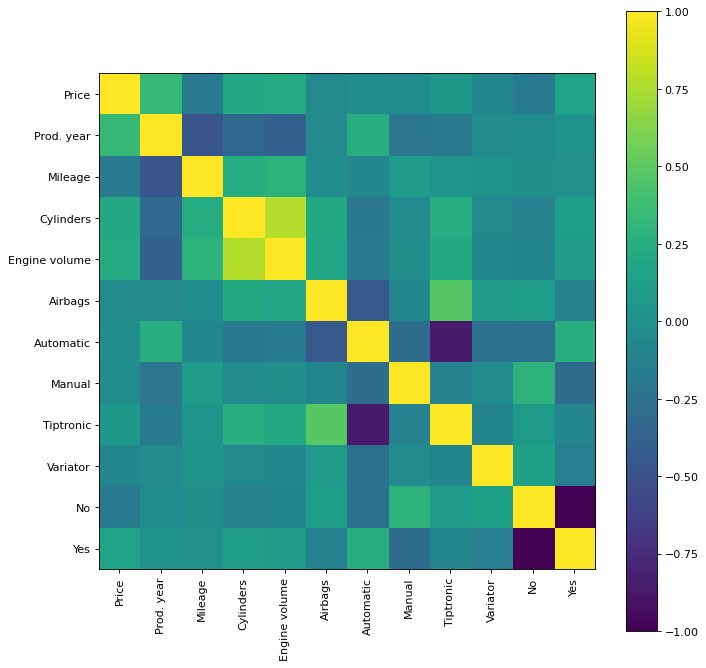

In [779]:
plotCorrelationMatrix(data1, 10)

In [780]:
# Com base na malha acima escolhemos as variaveis Prod. year e Cylinders para realizar o grafico 3D

In [781]:
X_treinamento_restringido = dados_treinamento[["Prod. year",
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']

resultados_treinamento = regress(Y_treinamento,X_treinamento_restringido)
resultados_treinamento.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:25:09   Log-Likelihood:                -48521.
No. Observations:                4433   AIC:                         9.706e+04
Df Residuals:                    4425   BIC:                         9.711e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.554e+06   9.36e+04    -37.976      0.000   -3.74e+06   -3.37e+06
Prod. year     3098.5151     81.261     38.130      0.000    2939.202    3257.828
Engine volume  7976.2024    265.673     30.023      0.000    7455.351    8497.054
Airbags        -563.4558     60.502     -9.313      0.000    -682.069    -444.843
Automatic     -8.937e+05   2.35e+04    -37.968      0.000    -9.4e+05   -8.48e+05
Manual        -8.807e+05   2.32e+04    -37.889      0.000   -9.26e+05   -8.35e+05
Tiptronic     -8.874e+05   2.34e+04    -37.862      0.000   -9.33e+05   -8.41e+05
Variator      -8.919e+05   2.34e+04    -38.100      0.000   -9.38e+05   -8.46e+05
No             -1.78e+06   4.68e+04    -38.044      0.000   -1.87e+06   -1.69e+06
Yes           -1.773e+06   4.68e+04    -37.906      0.000   -1.86e+06   -1.68e+06
==============================================================================
Omnibus:                     1349.094   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5575.440
Skew:                           1.443   Prob(JB):                         0.00
Kurtosis:                       7.676   Cond. No.                     2.49e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [782]:
X_teste_restringido = dados_teste[["Prod. year",  
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste[['Price']]
X_teste_completo = sm.add_constant(X_teste_restringido)
Y_previsto = resultados_treinamento.predict(X_teste_completo)

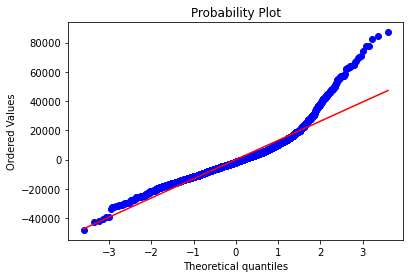

In [783]:
residuos = resultados_treinamento.resid

plt.figure(figsize=(6,4))
probplot(residuos, dist='norm', plot=plt);

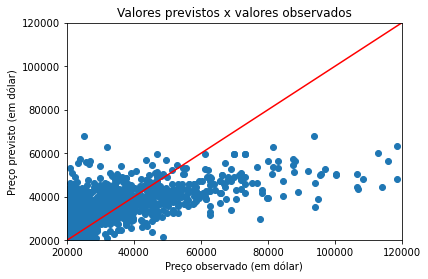

In [784]:
plt.scatter(Y_teste,Y_previsto)
plt.plot([20000,120000],[20000,120000], color='red')
plt.title('Valores previstos x valores observados')
plt.ylabel('Preço previsto (em dólar)')
plt.xlabel('Preço observado (em dólar)')
plt.xlim(20000,120000)
plt.ylim(20000,120000)
plt.show()

In [785]:
print(f"Score da regressão linar calculado por R^2 = {r2_score(Y_teste, Y_previsto)}")

Score da regressão linar calculado por R^2 = 0.35173039352417734


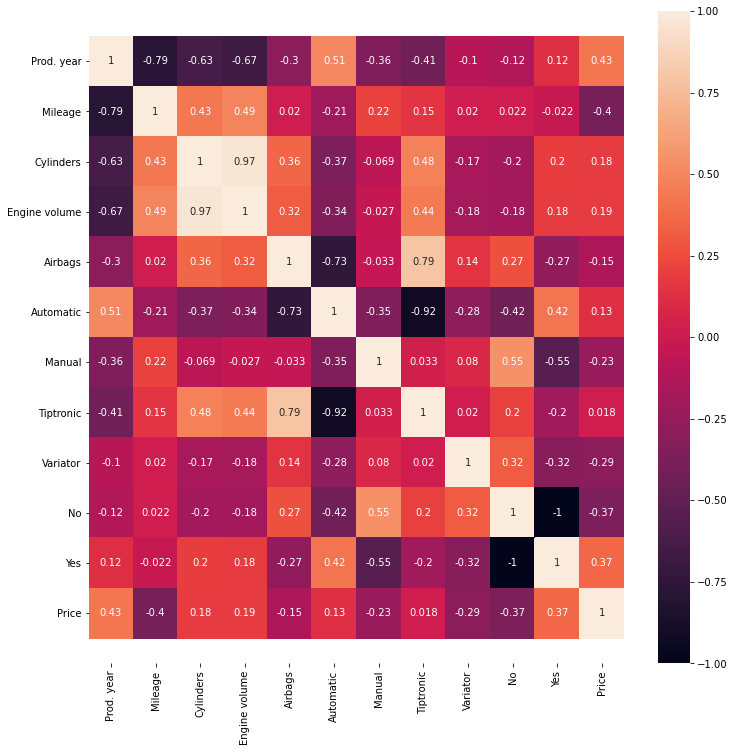

In [786]:
correlations = pd.concat([X_treinamento, pd.Series(Y_treinamento)], axis=1).corr()

plt.figure(figsize=(12,12))
df_corr = correlations.corr()
ax = sns.heatmap(df_corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib

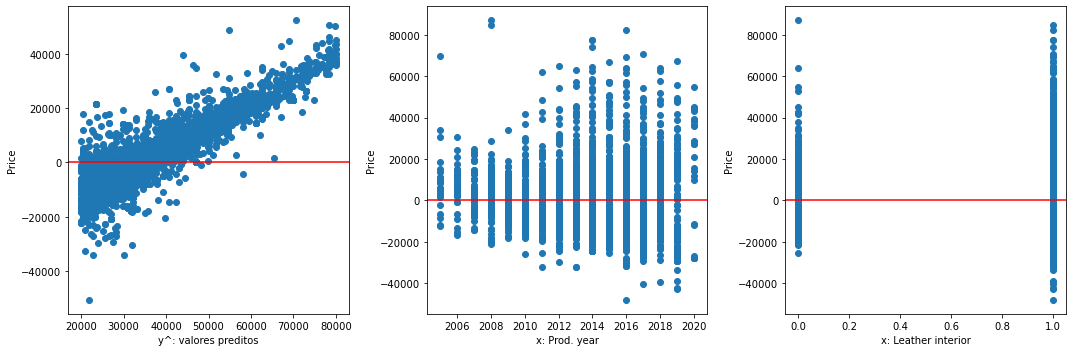

In [787]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(Y, results.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel('y^: valores preditos')



plt.subplot(133)
plt.scatter(X_treinamento_restringido.iloc[:,8], resultados_treinamento.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: Leather interior')



plt.subplot(132)
plt.scatter(X_treinamento_restringido.iloc[:,0], resultados_treinamento.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: {list(X_treinamento_restringido)[0]}')



plt.tight_layout()
plt.show()

In [788]:
# Recupera os parâmetros calculados
beta0_hat = results.params[0]  # Price
beta1_hat = results.params[1]  # Prod. year
beta2_hat = results.params[2]  # cylinders

In [789]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [821]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X['Prod. year']
feature2 = X['Cylinders']
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [822]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [823]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

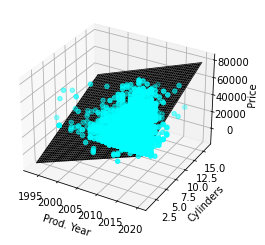

In [824]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z, color='black')
plt3d.scatter(feature1, feature2, Y, color="cyan")
plt3d.set_xlabel("Prod. Year")
plt3d.set_ylabel("Cylinders")
plt3d.set_zlabel("Price")
plt.show()

In [825]:
#Uso do PlynomialFeatures
passo_inicial = PolynomialFeatures(degree=5)

X1 = data1.Price.to_numpy().reshape(len(data1.Price.to_numpy()), 1)
Y1 = data1.Yes.to_numpy().reshape(len(data1.Cylinders.to_numpy()), 1)



#Transformando a variável dependente
polinomial_X1 = passo_inicial.fit_transform(X1)



polinomial_X1

array([[1.00000000e+00, 3.94930000e+04, 1.55969705e+09, 6.15971156e+13,
        2.43265488e+18, 9.60728394e+22],
       [1.00000000e+00, 2.66570000e+04, 7.10595649e+08, 1.89423482e+13,
        5.04946176e+17, 1.34603502e+22],
       [1.00000000e+00, 5.94640000e+04, 3.53596730e+09, 2.10262759e+14,
        1.25030647e+19, 7.43482240e+23],
       ...,
       [1.00000000e+00, 2.60170000e+04, 6.76884289e+08, 1.76104985e+13,
        4.58172341e+17, 1.19202698e+22],
       [1.00000000e+00, 2.97930000e+04, 8.87622849e+08, 2.64449475e+13,
        7.87874322e+17, 2.34731397e+22],
       [1.00000000e+00, 2.61080000e+04, 6.81627664e+08, 1.77959351e+13,
        4.64616272e+17, 1.21302016e+22]])

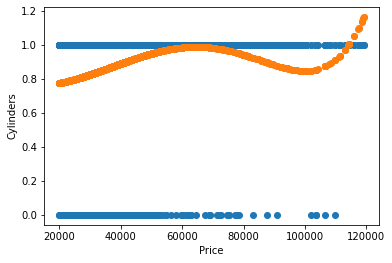

In [815]:
#Implememntando a regressão linear
modelo_inicial = LinearRegression()



#Ajuste dos dados
modelo_inicial.fit(polinomial_X1, Y1)



#Guardando a variável
Y_pred2 = modelo_inicial.predict(polinomial_X1)



#Plot do modelo
plt.scatter(X1, Y1)
plt.xlabel("Price")
plt.ylabel("Leather interior")
plt.scatter(X1, Y_pred2)

In [816]:
#Cálculo do root mean squared
primeiro_erro = (mean_squared_error(Y1, Y_pred2))**0.5



#Cálculo do coeficiente de determinação
media_Y1 = [Y1.mean()]*len(Y1)



r2 = 1 - (mean_squared_error(Y1, Y_pred2) / mean_squared_error(Y1, media_Y1))



xx = 0.022457*100



print("Obtivemos um RMS de Treinamento de valor: {0:.5}".format(primeiro_erro))
print("Obtivemos um R² (Coeficiente de Determinação) de valor: {0:.5}%".format(xx))

Obtivemos um RMS de Treinamento de valor: 0.34812
Obtivemos um R² (Coeficiente de Determinação) de valor: 2.2457%
